In [26]:
import IPython
import os
os.system("ls [a-z]*.md | sed 's/\.md$//'|grep -v ports| sort -u >ids.txt")
with open('ids.txt') as f:
    files = [ x.strip('\n') for x in f.readlines() ]
print (files)

# Create labels for the graph
flab = files

['adesai6', 'akarnauc', 'awilki13', 'bbass11', 'cflemmon', 'cjohn3', 'cmawhinn', 'dbarry', 'eezell3', 'eherron5', 'gjones2', 'gyj992', 'hchang13', 'jdong6', 'jdunca51', 'jpace7', 'jpovlin', 'jyu25', 'lpassare', 'mander59', 'mkramer6', 'mmahbub', 'mousavi', 'nmansou4', 'nschwerz', 'pgoedec1', 'pprovins', 'rdabbs1', 'rhossai2', 'ssadhu2', 'ssteinb2', 'trahman4', 'zrandall']


In [88]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
documents = []

text = ""
for f in files:
  a = open (f+".md")
  line = a.read()
  documents .append(line)
  text = text + " " + line
      
#Do tf.idf magic 
tfv = TfidfVectorizer()
tfidf = tfv.fit_transform(documents)
# no need to normalize, since Vectorizer will return normalized tf-idf
# we may want to see these, e.g., analyze in R
pd .DataFrame.from_records(tfidf.A).to_csv('tfidf.csv')

In [29]:
# Lets see the similarity matrix
# first create labels
idx = {}
for i in range(len(files)):
    idx[i] = files [i]

# Multiply the tfidf matrix to get all pairwise distances    
df = pd. DataFrame.from_records((tfidf * tfidf.T).A,columns=files)

#do pretty printing
pd.options.display.float_format = '{:20,.3f}'.format
df = df.rename(index=idx)
#Output to a file in case we want to look at it separately
df.to_csv("dist.csv")
df

,adesai6,akarnauc,awilki13,bbass11,cflemmon,cjohn3,cmawhinn,dbarry,eezell3,eherron5,...,nmansou4,nschwerz,pgoedec1,pprovins,rdabbs1,rhossai2,ssadhu2,ssteinb2,trahman4,zrandall
adesai6,1.000,0.050,0.082,0.118,0.142,0.074,0.110,0.063,0.072,0.096,...,0.114,0.142,0.094,0.113,0.052,0.056,0.118,0.136,0.047,0.128
akarnauc,0.050,1.000,0.216,0.172,0.162,0.126,0.061,0.059,0.095,0.185,...,0.239,0.224,0.099,0.098,0.157,0.114,0.072,0.167,0.107,0.200
awilki13,0.082,0.216,1.000,0.185,0.190,0.226,0.116,0.126,0.149,0.239,...,0.271,0.247,0.165,0.123,0.242,0.154,0.101,0.340,0.201,0.207
bbass11,0.118,0.172,0.185,1.000,0.175,0.246,0.168,0.200,0.204,0.276,...,0.155,0.172,0.170,0.127,0.285,0.248,0.087,0.169,0.170,0.238
cflemmon,0.142,0.162,0.190,0.175,1.000,0.153,0.064,0.105,0.085,0.180,...,0.289,0.226,0.207,0.089,0.155,0.139,0.120,0.163,0.207,0.191
cjohn3,0.074,0.126,0.226,0.246,0.153,1.000,0.235,0.227,0.258,0.232,...,0.188,0.132,0.202,0.096,0.244,0.214,0.099,0.116,0.203,0.118
cmawhinn,0.110,0.061,0.116,0.168,0.064,0.235,1.000,0.133,0.153,0.107,...,0.120,0.046,0.048,0.142,0.197,0.144,0.099,0.052,0.078,0.055
dbarry,0.063,0.059,0.126,0.200,0.105,0.227,0.133,1.000,0.140,0.155,...,0.109,0.139,0.119,0.084,0.209,0.223,0.056,0.103,0.151,0.120
eezell3,0.072,0.095,0.149,0.204,0.085,0.258,0.153,0.140,1.000,0.211,...,0.095,0.081,0.114,0.065,0.200,0.110,0.104,0.105,0.153,0.104
eherron5,0.096,0.185,0.239,0.276,0.180,0.232,0.107,0.155,0.211,1.000,...,0.176,0.144,0.183,0.060,0.214,0.155,0.095,0.242,0.202,0.177


In [30]:
import networkx as nx
import json

# use these distances to create a graph by cutting links below .21 
nxg = nx.Graph()
for i in range(len(files)-1):
    nLinks = 0
    maxVal = 0
    jMax = 0
    for j in range(i+1,len(files)):
        if df.iloc[i,j] > maxVal: 
            maxVal = df.iloc[i,j]
            jMax = j
        if (df.iloc[i,j] > .37):
            nLinks += 1
            nxg.add_edge(flab[i], flab[j], weight=df.iloc[i,j],color='r')
    if nLinks == 0:
        nxg.add_edge(flab[i], flab[jMax], weight=df.iloc[i,jMax],color='r')
        
print (nxg.nodes())

['mkramer6', 'zrandall', 'lpassare', 'rhossai2', 'ssadhu2', 'hchang13', 'nschwerz', 'mander59', 'bbass11', 'akarnauc', 'gyj992', 'nmansou4', 'jpovlin', 'mmahbub', 'rdabbs1', 'adesai6', 'ssteinb2', 'cmawhinn', 'cjohn3', 'eherron5', 'jpace7', 'jdunca51', 'dbarry', 'jyu25', 'gjones2', 'eezell3', 'awilki13', 'jdong6', 'pprovins', 'cflemmon', 'mousavi', 'pgoedec1', 'trahman4']


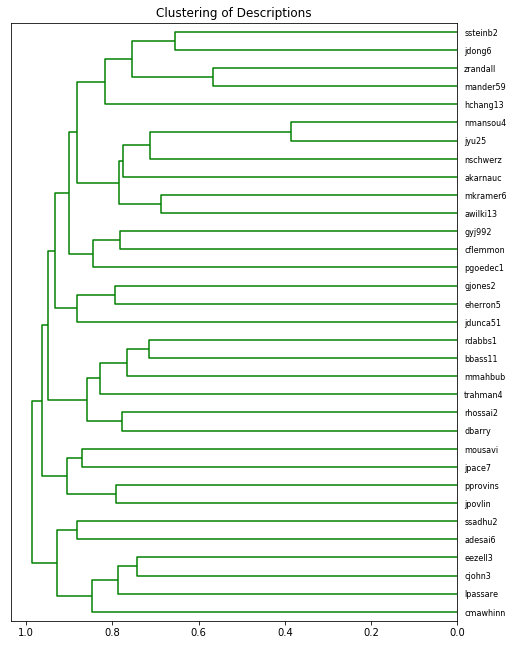

In [31]:
from scipy.cluster.hierarchy import linkage, ward, dendrogram
from scipy.spatial.distance import pdist
import math
import matplotlib.pyplot as plt
import numpy as np
import re

%matplotlib inline

# Calculate cosine distance (clustering needs distance, not similarity)   
#dist ij = dist2 [i*(n-1)+j] and i < j
dist1 = pdist(tfidf.A, 'cosine')
minVal = min(dist1)
ij = np.where(dist1==minVal)[0][0]
for i in range(0,32):
    for j in range (i+1,33):
        ij -= 1
        if ij == 0: 
            break
    else:        
        continue  
    break
#print (flab[i] + " " + flab[j+1] + " "+ str (minVal))
#a = open (flab[i]+".md")
#line = a.read()
#print(line)
#a = open (flab[j+1]+".md")
#line = a.read()
#print(line)


# Do clustering
linkage_matrix = linkage (dist1, method='complete')
#print(linkage_matrix)
#print (flab[int(linkage_matrix[0][0])] + " " + flab[int(linkage_matrix[0][1])])
# Plot results
fig = plt.figure(1, figsize=(8, 11))
plt.clf()
ddata = dendrogram(linkage_matrix,
               color_threshold=1,
               p=97,
               labels=flab,
               truncate_mode='none',
               orientation='left',
                show_leaf_counts=True,
               )
plt.title("Clustering of Descriptions")
fig.savefig("teaming.png")


In [32]:
from networkx.readwrite import json_graph
nld = json_graph.node_link_data(nxg)
json.dump(nld, open('students.json','w'))
from IPython.display import IFrame
from IPython.core.display import display
# IPython Notebook can serve files and display them into
# inline frames. Prepend the path with the 'files' prefix.
viz_file = 'files/students.html'
display(IFrame(viz_file, '100%', '400px'))

# Approaches for text analysis

## BOW + TFIDF

In [148]:


tfv_lookup = { word: idx for idx, word in enumerate(tfv.get_feature_names())}
#print(tfidf.get_shape)
srch = tfv_lookup['computer']
dst = tfidf[:,srch].A
#find a person closest to the term 'computer'
for i in range(len(flab)): 
  if dst[i]>.11: print (flab[i] +' '+ str(dst[i]) + ' ' + documents[i])

mander59 [ 0.12255168] I am Matt Anderson and I am a senior majoring in Computer Science with a minor in Business. I am interested in cyber security and looking forward to this class.

mkramer6 [ 0.14413479] I am Matthew Kramer and I am a senior currently pursuing a Computer Science Degree with a minor in Cyber Security. I instantly found a love for programming after my first computer science class in High School and am trying to convert that into a stable occupation. I chose this class due to the description sounding interesting and being outside of my comfort zone. I hope to learn a lot in this class to better gauge what I want to work on when I complete my degree. When I am not working on my computer, I love to rock climb and play guitar.

zrandall [ 0.12020136] I am Zach Randall and I am a senior in Computer Engineering. I am interested in cyber security and am excited to some data analysis skills from this class.



## LSI - latent semantic indexing

In [192]:

from gensim.models import LsiModel
from gensim.corpora import Dictionary, TextCorpus


f = open("corpus.txt","w") 
for i in range(len(flab)):
  line = re.sub('\n', ' ', documents[i])
  f.write(line+'\n') 
f.close()

corpus = TextCorpus("corpus.txt")

model = LsiModel (corpus,num_topics=10)

vectorized_corpus = model[corpus]

In [197]:
from gensim.similarities import Similarity
import pprint
from gensim.corpora import WikiCorpus, wikicorpus
tokenize_func = wikicorpus.tokenize 

sdocs = ["computer science",
             "data science" ]
# A corpus can be anything, as long as iterating over it produces a representation of the corpus documents as vectors.
crp1 = (corpus.dictionary.doc2bow(tokenize_func(document)) for document in sdocs)

index = Similarity(corpus=model[corpus], num_features=10, output_prefix="shard")

print ("Similarities of index corpus documents to one another:")
#pprint.pprint([s for s in index])

query = "computer science"
sims_to_query = index[model[corpus.dictionary.doc2bow(tokenize_func(query))]]
print ("Similarities of index corpus documents to '%s'" % query)
pprint.pprint (sims_to_query)

best_score = max(sims_to_query)
idx = sims_to_query.tolist().index(best_score)
most_similar_doc = documents [idx]
print ("The document most similar to the query is '%s' with a score of %.2f." % (most_similar_doc, best_score))

Similarities of index corpus documents to one another:
Similarities of index corpus documents to 'computer science'
array([ 0.83143246,  0.60598791,  0.71987462,  0.59611022,  0.68048453,
        0.38446194,  0.58106637,  0.29453352,  0.45433268,  0.65690213,
        0.57344204,  0.41936022,  0.57131064,  0.8539145 ,  0.67521656,
        0.38126767,  0.53018165,  0.66558719,  0.69742972,  0.59654331,
        0.55147201,  0.25590408,  0.8567552 ,  0.63078189,  0.78591979,
        0.64524204,  0.63960844,  0.57123148,  0.52445459,  0.18217914,
        0.79378128,  0.34792608,  0.76985043], dtype=float32)
The document most similar to the query is 'I am Sara Mousavi majoring in computer science. I am intersted in deep learning, data analytics, programming, playing phone games, watching TV and working out.
' with a score of 0.86.


In [198]:
query1 = "data science"
sims_to_query1 = index[model[corpus.dictionary.doc2bow(tokenize_func(query1))]]
best_score = max(sims_to_query1)
idx = sims_to_query1.tolist().index(best_score)
most_similar_doc = documents [idx]
print ("The document most similar to 'data science' is '%s' with a score of %.2f." % (most_similar_doc, best_score))

The document most similar to 'data science' is 'I am Trish Goedecke; a consulting statistician at UTHSC in Memphis, and a student in UTK's data science and engineering program. I am eager to learn python, and looking to join projects applying cutting edge data science to medical research, in areas such as genetics, streaming data, or data mining of electronic medical records. 
' with a score of 0.92.


## LDA - Latent Dirichle allocation

In [221]:
# Train the model on the corpus.
from gensim.models import LdaModel
lda = LdaModel(corpus, id2word=corpus.dictionary, num_topics=3)
lda .show_topics(num_topics=3,num_words=7)

[(0,
  '0.032*"science" + 0.017*"data" + 0.016*"senior" + 0.016*"majoring" + 0.014*"class" + 0.011*"interested" + 0.009*"security"'),
 (1,
  '0.047*"data" + 0.029*"science" + 0.018*"engineering" + 0.015*"student" + 0.011*"work" + 0.010*"phd" + 0.009*"like"'),
 (2,
  '0.029*"data" + 0.024*"science" + 0.020*"class" + 0.018*"senior" + 0.014*"learn" + 0.010*"like" + 0.008*"looking"')]

In [220]:
query = "computer science"
query = corpus.dictionary.doc2bow(tokenize_func(query))
print(lda[query])
lda.print_topic(lda[query][-1][0]) #prind second topic

[(0, 0.18567717862476027), (1, 0.60891251395246992), (2, 0.20541030742276994)]


'0.031*"data" + 0.029*"science" + 0.023*"class" + 0.020*"senior" + 0.014*"forward" + 0.012*"looking" + 0.009*"student" + 0.008*"minor" + 0.008*"engineering" + 0.008*"security"'

### The second topic seems to fit this query the best

## Word2Vec and Doc2Vec

In [321]:
# gensim modules
from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models import Doc2Vec
import gzip
import numpy
from sklearn.linear_model import LogisticRegression

# random
import random
class LabeledLineSentence(object):
  def __init__(self, sources):
    self.sources = sources
        
    flipped = {}
        
    # make sure that keys are unique
    for key, value in sources.items():
      if value not in flipped:
        flipped[value] = [key]
      else:
        raise Exception('Non-unique prefix encountered')
   
  def __iter__(self):
    for source, prefix in self.sources.items():
      with gzip.open(source) as fin:
        for item_no, line in enumerate(fin):          
          yield LabeledSentence(utils.to_unicode(line).split(), [prefix ])
    
  def to_array(self):
    self.sentences = []
    for source, prefix in self.sources.items():
      with gzip.open(source) as fin:
        for item_no, line in enumerate(fin):
          self.sentences.append(LabeledSentence(utils.to_unicode(line).split(), [ prefix ]))
    return self.sentences
    
  def sentences_perm(self):
    shuffled = list(self.sentences)
    random.shuffle(shuffled)
    return shuffled

corpus = LabeledLineSentence(sources={'pos.gz':'POS', 'neg.gz':'NEG'})

In [323]:
import math;

for w in (3, 5, 10, 15):
 for ep in (5, 10, 15, 20):
  d2v = Doc2Vec(min_count=1, window=w, size=100, sample=1e-4, negative=5, workers=7)
  d2v.build_vocab(corpus.to_array())
  d2v.train(corpus.sentences_perm(),epochs=ep,total_examples=d2v.corpus_count)
  d2v.save('./imdb.ep'+str(ep)+'.w'+str(w)+'.d2v') #10 is optimal 40 bad
  nn = math.sqrt(sum(d2v.docvecs['NEG']*d2v.docvecs['NEG']))
  np = math.sqrt(sum(d2v.docvecs['POS']*d2v.docvecs['POS']))
  pred = [];
  for i in range(50000):
   iv = d2v.infer_vector(corpus.sentences[i][0])
   ni = math.sqrt(sum(iv*iv))
   ivn = sum (iv * d2v.docvecs['NEG'])/ni/nn
   ivp = sum (iv * d2v.docvecs['POS'])/ni/np
   pred.append(ivp > ivn)
  tru = 0;
  for i in range(50000):
   if pred[i] == True and i < 25000: tru += 1
   if pred[i] == False and i >= 25000: tru += 1   
  print ('ep='+str(ep)+' w='+str(w)+' acc='+str(tru/50000.0))
    

ep=5 w=3 acc=0.67594
ep=10 w=3 acc=0.65458
ep=15 w=3 acc=0.78578
ep=20 w=3 acc=0.86942
ep=5 w=5 acc=0.70572
ep=10 w=5 acc=0.80946
ep=15 w=5 acc=0.88344
ep=20 w=5 acc=0.88484
ep=5 w=10 acc=0.8531
ep=10 w=10 acc=0.88816
ep=15 w=10 acc=0.8847
ep=20 w=10 acc=0.86502
ep=5 w=15 acc=0.88116
ep=10 w=15 acc=0.88032
ep=15 w=15 acc=0.87614
ep=20 w=15 acc=0.83662


In [325]:
for w in [3]:
 for ep in (25, 40):
  d2v = Doc2Vec(min_count=1, window=w, size=100, sample=1e-4, negative=5, workers=7)
  d2v.build_vocab(corpus.to_array())
  d2v.train(corpus.sentences_perm(),epochs=ep,total_examples=d2v.corpus_count)
  d2v.save('./imdb.ep'+str(ep)+'.w'+str(w)+'.d2v') #10 is optimal 40 bad
  nn = math.sqrt(sum(d2v.docvecs['NEG']*d2v.docvecs['NEG']))
  np = math.sqrt(sum(d2v.docvecs['POS']*d2v.docvecs['POS']))
  pred = [];
  for i in range(50000):
   iv = d2v.infer_vector(corpus.sentences[i][0])
   ni = math.sqrt(sum(iv*iv))
   ivn = sum (iv * d2v.docvecs['NEG'])/ni/nn
   ivp = sum (iv * d2v.docvecs['POS'])/ni/np
   pred.append(ivp > ivn)
  tru = 0;
  for i in range(50000):
   if pred[i] == True and i < 25000: tru += 1
   if pred[i] == False and i >= 25000: tru += 1   
  print ('ep='+str(ep)+' w='+str(w)+' acc='+str(tru/50000.0))
    

ep=25 w=3 acc=0.8832
ep=40 w=3 acc=0.8723


In [326]:
for w in [2,4]:
 for ep in (20, 25, 30):
  d2v = Doc2Vec(min_count=1, window=w, size=100, sample=1e-4, negative=5, workers=7)
  d2v.build_vocab(corpus.to_array())
  d2v.train(corpus.sentences_perm(),epochs=ep,total_examples=d2v.corpus_count)
  d2v.save('./imdb.ep'+str(ep)+'.w'+str(w)+'.d2v') #10 is optimal 40 bad
  nn = math.sqrt(sum(d2v.docvecs['NEG']*d2v.docvecs['NEG']))
  np = math.sqrt(sum(d2v.docvecs['POS']*d2v.docvecs['POS']))
  pred = [];
  for i in range(50000):
   iv = d2v.infer_vector(corpus.sentences[i][0])
   ni = math.sqrt(sum(iv*iv))
   ivn = sum (iv * d2v.docvecs['NEG'])/ni/nn
   ivp = sum (iv * d2v.docvecs['POS'])/ni/np
   pred.append(ivp > ivn)
  tru = 0;
  for i in range(50000):
   if pred[i] == True and i < 25000: tru += 1
   if pred[i] == False and i >= 25000: tru += 1   
  print ('ep='+str(ep)+' w='+str(w)+' acc='+str(tru/50000.0))

ep=20 w=2 acc=0.79114
ep=25 w=2 acc=0.85564
ep=30 w=2 acc=0.87276
ep=20 w=4 acc=0.88708
ep=25 w=4 acc=0.8794
ep=30 w=4 acc=0.87422


In [328]:
for w in (9, 11, 10):
 for ep in (9, 10, 11):
  d2v = Doc2Vec(min_count=1, window=w, size=100, sample=1e-4, negative=5, workers=7)
  d2v.build_vocab(corpus.to_array())
  d2v.train(corpus.sentences_perm(),epochs=ep,total_examples=d2v.corpus_count)
  d2v.save('./imdb.ep'+str(ep)+'.w'+str(w)+'.d2v') #10 is optimal 40 bad
  nn = math.sqrt(sum(d2v.docvecs['NEG']*d2v.docvecs['NEG']))
  np = math.sqrt(sum(d2v.docvecs['POS']*d2v.docvecs['POS']))
  pred = [];
  for i in range(50000):
   iv = d2v.infer_vector(corpus.sentences[i][0])
   ni = math.sqrt(sum(iv*iv))
   ivn = sum (iv * d2v.docvecs['NEG'])/ni/nn
   ivp = sum (iv * d2v.docvecs['POS'])/ni/np
   pred.append(ivp > ivn)
  tru = 0;
  for i in range(50000):
   if pred[i] == True and i < 25000: tru += 1
   if pred[i] == False and i >= 25000: tru += 1   
  print ('ep='+str(ep)+' w='+str(w)+' acc='+str(tru/50000.0))

ep=9 w=9 acc=0.87768
ep=10 w=9 acc=0.88528
ep=11 w=9 acc=0.88566
ep=9 w=11 acc=0.88646
ep=10 w=11 acc=0.88618
ep=11 w=11 acc=0.88326
ep=9 w=10 acc=0.88324
ep=10 w=10 acc=0.8873
ep=11 w=10 acc=0.88654


In [334]:
w=10
ep = 10
for sa in (2e-5, 3e-5):
 for ns in [ 6, 7 ]:
  for sz in (90, 95):   
   d2v = Doc2Vec(min_count=1, window=w, size=sz, sample=sa, negative=ns, workers=7)
   d2v.build_vocab(corpus.to_array())
   d2v.train(corpus.sentences_perm(),epochs=ep,total_examples=d2v.corpus_count)
   #d2v.save('./imdb.ep'+str(ep)+'.w'+str(w)+'.d2v') #10 is optimal 40 bad
   nn = math.sqrt(sum(d2v.docvecs['NEG']*d2v.docvecs['NEG']))
   np = math.sqrt(sum(d2v.docvecs['POS']*d2v.docvecs['POS']))
   pred = [];
   for i in range(50000):
    iv = d2v.infer_vector(corpus.sentences[i][0])
    ni = math.sqrt(sum(iv*iv))
    ivn = sum (iv * d2v.docvecs['NEG'])/ni/nn
    ivp = sum (iv * d2v.docvecs['POS'])/ni/np
    pred.append(ivp > ivn)
   tru = 0;
   for i in range(50000):
    if pred[i] == True and i < 25000: tru += 1
    if pred[i] == False and i >= 25000: tru += 1   
   print ('ep='+str(ep)+' w='+str(w)+' sa='+str(sa)+' ns='+str(ns)+' sz='+str(sz)+' acc='+str(tru/50000.0))

ep=10 w=10 sa=2e-05 ns=6 sz=90 acc=0.89238
ep=10 w=10 sa=2e-05 ns=6 sz=95 acc=0.88904
ep=10 w=10 sa=2e-05 ns=7 sz=90 acc=0.88722
ep=10 w=10 sa=2e-05 ns=7 sz=95 acc=0.88878
ep=10 w=10 sa=3e-05 ns=6 sz=90 acc=0.8862
ep=10 w=10 sa=3e-05 ns=6 sz=95 acc=0.89096
ep=10 w=10 sa=3e-05 ns=7 sz=90 acc=0.8929
ep=10 w=10 sa=3e-05 ns=7 sz=95 acc=0.8901


In [327]:
d2v.most_similar('good')

[('great', 0.7006831765174866),
 ('decent', 0.6766880750656128),
 ('bad', 0.6580454111099243),
 ('nice', 0.6188746690750122),
 ('terrific', 0.5916984677314758),
 ('solid', 0.5897783041000366),
 ('fine', 0.5601633787155151),
 ('roselina', 0.5582941770553589),
 ('reak', 0.5578945279121399),
 ('passable', 0.5531889796257019)]

In [262]:
d2v.docvecs['NEG']

array([-0.79838222,  0.12151772, -0.92435265, -0.46299124, -0.56452048,
       -1.23210418, -2.44014001, -0.59871   ,  0.26792476, -0.23406811,
        0.1818139 , -1.03144228, -3.09669399, -2.52545571, -2.1112473 ,
       -3.09592795, -0.10257489,  3.07035899, -1.93702567,  0.34065786,
       -0.12825036, -0.77809   ,  0.96191663,  4.0352335 ,  1.71774435,
       -0.71466851,  5.20107794, -0.73876977,  1.27344465, -3.76774216,
       -0.21790522, -1.31231022,  0.69909656, -0.81849337, -0.50536007,
       -3.62961912, -2.72662163, -1.08575761, -4.18522501,  1.55017424,
        2.31208134,  2.20991755,  1.70716846,  1.67720509,  1.56481862,
        0.77370089, -1.66742194, -1.384179  , -1.51816308, -0.46514204,
       -0.82033628, -1.93164146,  1.1580441 ,  3.42229342, -1.47762001,
        0.42112908,  0.32617787, -0.61749125, -3.32173586, -2.56895471,
        1.01622355,  0.57171178,  0.07857493, -3.90092397, -1.35944903,
       -1.57938325, -3.28408742, -0.81211299,  0.24366033, -0.05

In [267]:
import math;
for i in range(len(flab)):
  iv = d2v.infer_vector(documents[0].split())
  ni = math.sqrt(sum(iv*iv))
  nn = math.sqrt(sum(d2v.docvecs['NEG']*d2v.docvecs['NEG']))
  np = math.sqrt(sum(d2v.docvecs['POS']*d2v.docvecs['POS']))
  ivn = sum (iv * d2v.docvecs['NEG'])/ni/nn
  ivp = sum (iv * d2v.docvecs['POS'])/ni/np
  if ivp > ivn: print(flab[i]+' sentiment:'+str(ivp-ivn))



nschwerz sentiment:0.0244336601645
trahman4 sentiment:0.0135693650126


### only two students have positive sentiment

In [316]:
# gensim modules
from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models import Doc2Vec
import gzip
import numpy
from sklearn.linear_model import LogisticRegression

# random
import random
class LabeledLineSentence1(object):
  def __init__(self, sources):
    self.sources = sources
        
    flipped = {}
        
    # make sure that keys are unique
    for key, value in sources.items():
      if value not in flipped:
        flipped[value] = [key]
      else:
        raise Exception('Non-unique prefix encountered')
   
  def __iter__(self):
    for source, prefix in self.sources.items():
      with gzip.open(source) as fin:
        for item_no, line in enumerate(fin):          
          yield LabeledSentence(utils.to_unicode(line).split(), [prefix, str(item_no) ])
    
  def to_array(self):
    self.sentences = []
    for source, prefix in self.sources.items():
      with gzip.open(source) as fin:
        for item_no, line in enumerate(fin):
          self.sentences.append(LabeledSentence(utils.to_unicode(line).split(), [ prefix, str(item_no) ]))
    return self.sentences
    
  def sentences_perm(self):
    shuffled = list(self.sentences)
    random.shuffle(shuffled)
    return shuffled

corpus1 = LabeledLineSentence1(sources={'pos.gz':'POS', 'neg.gz':'NEG'})

d2v2 = Doc2Vec(min_count=1, window=10, size=100, sample=1e-4, negative=5, workers=7)
d2v2.build_vocab(corpus1.to_array())
d2v2.train(corpus1.sentences_perm(),epochs=20, total_examples=d2v.corpus_count)
d2v2.save('./imdb.ep20d2v2')

In [319]:
pred = [];
pred1 = [];
import math;
nn = math.sqrt(sum(d2v2.docvecs['NEG']*d2v2.docvecs['NEG']))
np = math.sqrt(sum(d2v2.docvecs['POS']*d2v2.docvecs['POS']))

for i in range(50000):
  j = i;
  if i >= 25000: j = i - 25000
  iv = d2v2.infer_vector(corpus1.sentences[i][0])
  iv1 = d2v2.docvecs [str(j)]
  ni = math.sqrt(sum(iv*iv))
  ni1 = math.sqrt(sum(iv1*iv1))
  ivn = sum (iv * d2v2.docvecs['NEG'])/ni/nn
  ivp = sum (iv * d2v2.docvecs['POS'])/ni/np
  ivn1 = sum (iv1 * d2v2.docvecs['NEG'])/ni/nn
  ivp1 = sum (iv1 * d2v2.docvecs['POS'])/ni/np
  pred.append(ivp > ivn)
  pred1.append(ivp1 > ivn1)

tru = 0;
tru1 = 0;
for i in range(50000):
  if pred[i] == True and i < 25000: tru += 1
  if pred[i] == False and i >= 25000: tru += 1
  if pred1[i] == True and i < 25000: tru1 += 1
  if pred1[i] == False and i >= 25000: tru1 += 1

In [320]:
print (str(tru/50000.0))
print (str(tru1/50000.0))

0.88132
0.5
